In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/new-york-city-transport-statistics/mta_1708.csv
/kaggle/input/new-york-city-transport-statistics/mta_1706.csv
/kaggle/input/new-york-city-transport-statistics/mta_1712.csv
/kaggle/input/new-york-city-transport-statistics/mta_1710.csv


In [7]:
usecols=["RecordedAtTime", "DirectionRef", "PublishedLineName", "OriginName", "OriginLat", "OriginLong", "DestinationName", "DestinationLat", "DestinationLong", "VehicleRef", "VehicleLocation.Latitude", "VehicleLocation.Longitude", "NextStopPointName", "ArrivalProximityText", "DistanceFromStop", "ExpectedArrivalTime", "ScheduledArrivalTime"]

busdata1 = pd.read_csv("/kaggle/input/new-york-city-transport-statistics/mta_1706.csv", usecols=usecols)
print("Bus Data mta_1706:", busdata1.shape)

busdata2 = pd.read_csv("/kaggle/input/new-york-city-transport-statistics/mta_1708.csv", usecols=usecols)
print("Bus Data mta_1708:", busdata2.shape)

busdata3 = pd.read_csv("/kaggle/input/new-york-city-transport-statistics/mta_1710.csv", usecols=usecols)
print("Bus Data mta_1710:", busdata3.shape)

busdata4 = pd.read_csv("/kaggle/input/new-york-city-transport-statistics/mta_1712.csv", usecols=usecols)
print("Bus Data mta_1712:", busdata4.shape)

<ipython-input-7-2b13bb5d0802>:3: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  busdata1 = pd.read_csv("/kaggle/input/new-york-city-transport-statistics/mta_1706.csv", usecols=usecols)


Bus Data mta_1706: (6730856, 17)


<ipython-input-7-2b13bb5d0802>:6: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  busdata2 = pd.read_csv("/kaggle/input/new-york-city-transport-statistics/mta_1708.csv", usecols=usecols)


Bus Data mta_1708: (6463980, 17)


<ipython-input-7-2b13bb5d0802>:9: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  busdata3 = pd.read_csv("/kaggle/input/new-york-city-transport-statistics/mta_1710.csv", usecols=usecols)


Bus Data mta_1710: (6865841, 17)


<ipython-input-7-2b13bb5d0802>:12: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  busdata4 = pd.read_csv("/kaggle/input/new-york-city-transport-statistics/mta_1712.csv", usecols=usecols)


Bus Data mta_1712: (6461753, 17)


In [8]:
busdata1.head()

,RecordedAtTime,DirectionRef,PublishedLineName,OriginName,OriginLat,OriginLong,DestinationName,DestinationLat,DestinationLong,VehicleRef,VehicleLocation.Latitude,VehicleLocation.Longitude,NextStopPointName,ArrivalProximityText,DistanceFromStop,ExpectedArrivalTime,ScheduledArrivalTime
0,2017-06-01 00:03:34,0,B8,4 AV/95 ST,40.616104,-74.031143,BROWNSVILLE ROCKAWAY AV,40.656048,-73.907379,NYCT_430,40.635170,-73.960803,FOSTER AV/E 18 ST,approaching,76.0,2017-06-01 00:03:59,24:06:14
1,2017-06-01 00:03:43,1,S61,ST GEORGE FERRY/S61 & S91,40.643169,-74.073494,S I MALL YUKON AV,40.575935,-74.167686,NYCT_8263,40.590802,-74.158340,MERRYMOUNT ST/TRAVIS AV,approaching,62.0,2017-06-01 00:03:56,23:58:02
2,2017-06-01 00:03:49,0,Bx10,E 206 ST/BAINBRIDGE AV,40.875008,-73.880142,RIVERDALE 263 ST,40.912376,-73.902534,NYCT_4223,40.886010,-73.912647,HENRY HUDSON PKY E/W 235 ST,at stop,5.0,2017-06-01 00:03:56,24:00:53
3,2017-06-01 00:03:31,0,Q5,TEARDROP/LAYOVER,40.701748,-73.802399,ROSEDALE LIRR STA via MERRICK,40.666012,-73.735939,NYCT_8422,40.668002,-73.729348,HOOK CREEK BL/SUNRISE HY,< 1 stop away,267.0,2017-06-01 00:04:03,24:03:00
4,2017-06-01 00:03:22,1,Bx1,RIVERDALE AV/W 231 ST,40.881187,-73.909340,MOTT HAVEN 136 ST via CONCOURSE,40.809654,-73.928360,NYCT_4710,40.868134,-73.893032,GRAND CONCOURSE/E 196 ST,at stop,11.0,2017-06-01 00:03:56,23:59:38


<ipython-input-16-401154bf78db>:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hourly_totals = df_trips.groupby(['DayOfWeek', 'HourOfDay']).size().unstack(fill_value=0)


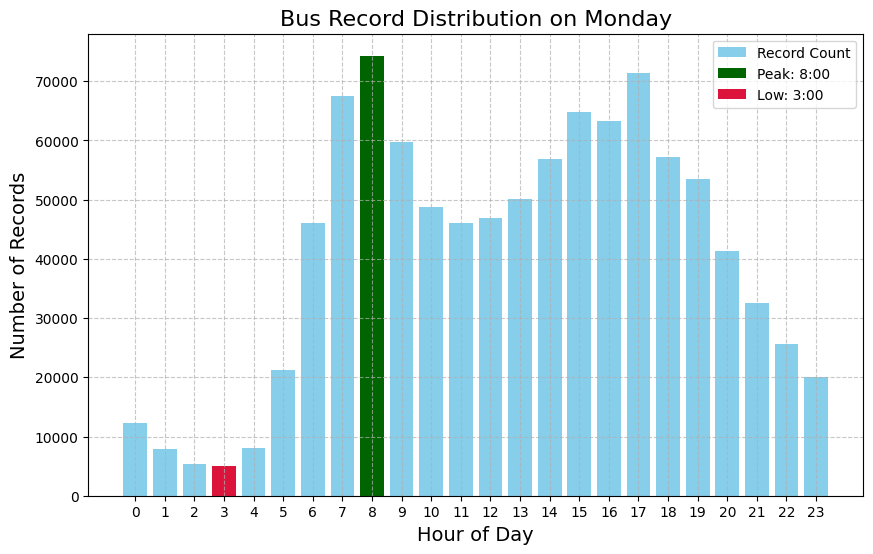

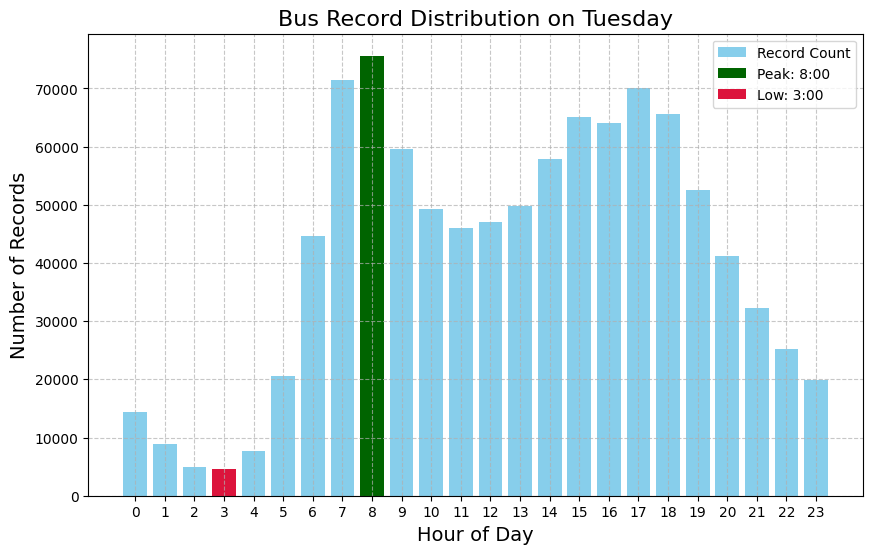

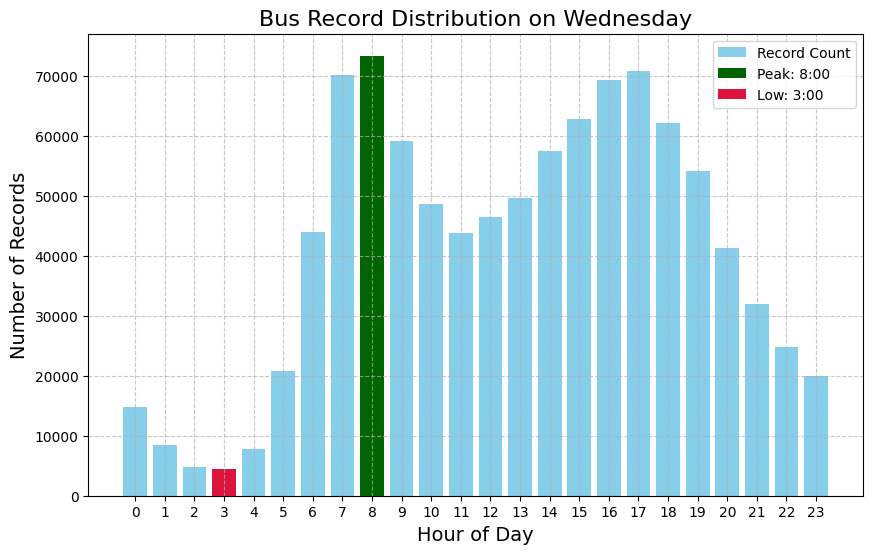

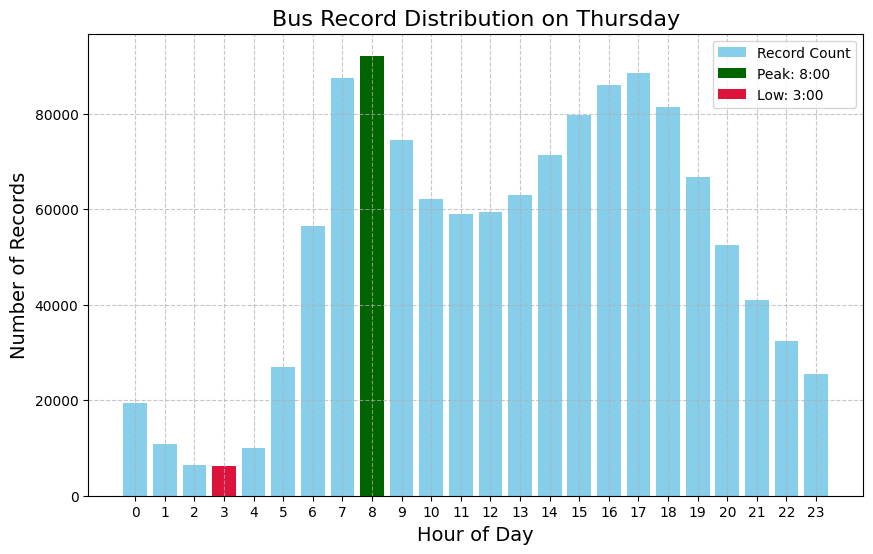

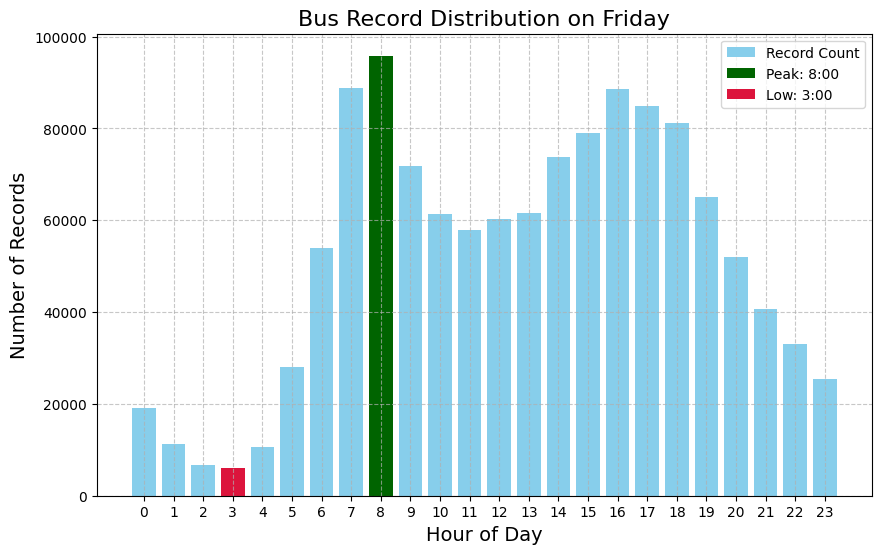

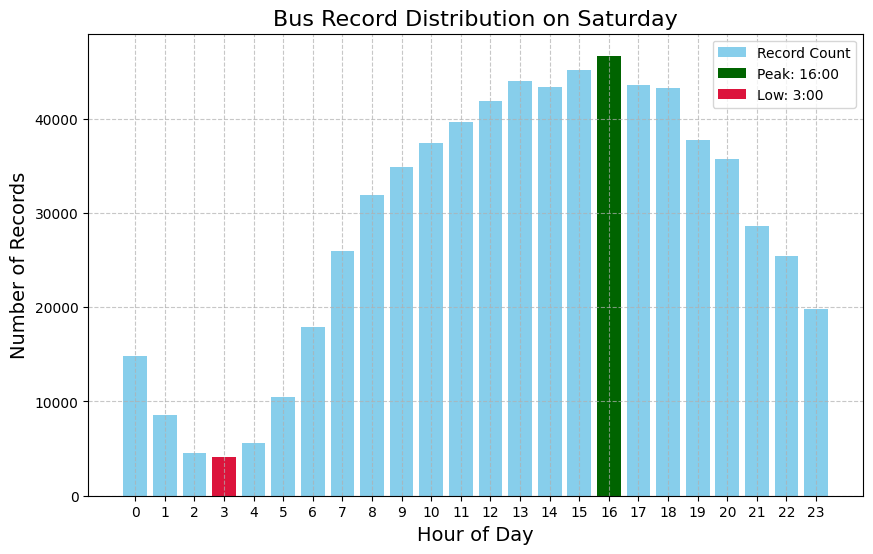

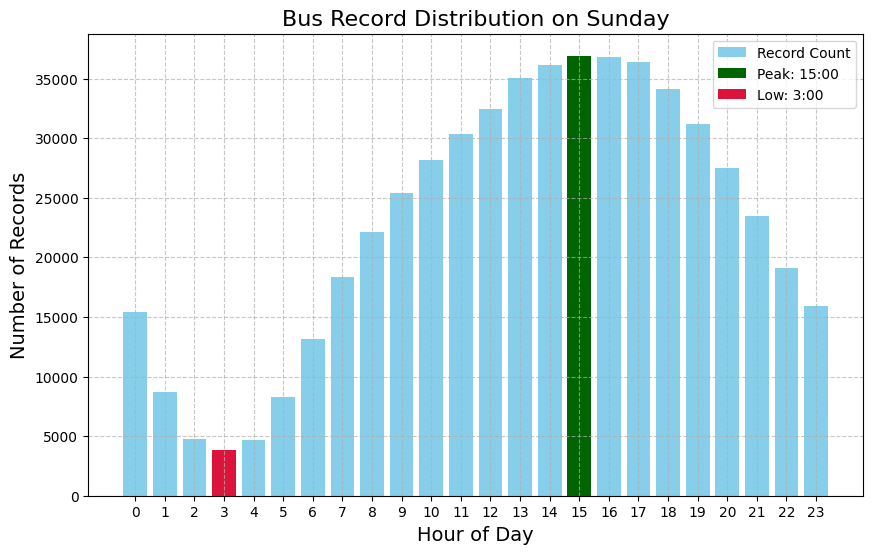

   DayOfWeek  PeakTime  LowTime  \
0     Monday         8        3   
1    Tuesday         8        3   
2  Wednesday         8        3   
3   Thursday         8        3   
4     Friday         8        3   
5   Saturday        16        3   
6     Sunday        15        3   

                                        HourlyCounts  
0  {0: 12266, 1: 7903, 2: 5353, 3: 4998, 4: 8078,...  
1  {0: 14369, 1: 8846, 2: 4932, 3: 4631, 4: 7605,...  
2  {0: 14871, 1: 8510, 2: 4846, 3: 4535, 4: 7785,...  
3  {0: 19355, 1: 10833, 2: 6522, 3: 6173, 4: 1004...  
4  {0: 19185, 1: 11298, 2: 6590, 3: 6028, 4: 1066...  
5  {0: 14804, 1: 8566, 2: 4525, 3: 4105, 4: 5609,...  
6  {0: 15453, 1: 8679, 2: 4727, 3: 3797, 4: 4703,...  


In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a copy of the dataset
df_trips = busdata1.copy()

# Convert the timestamp to datetime format
df_trips['RecordedAtTime'] = pd.to_datetime(df_trips['RecordedAtTime'])

# Create new columns for the day of the week and the hour of the day
df_trips['DayOfWeek'] = df_trips['RecordedAtTime'].dt.day_name()
df_trips['HourOfDay'] = df_trips['RecordedAtTime'].dt.hour

# Specify the desired order of the days
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert the DayOfWeek column to an ordered categorical type
df_trips['DayOfWeek'] = pd.Categorical(df_trips['DayOfWeek'], categories=ordered_days, ordered=True)

# Group by day of the week and hour, then count the number of records
hourly_totals = df_trips.groupby(['DayOfWeek', 'HourOfDay']).size().unstack(fill_value=0)
hourly_totals = hourly_totals.reindex(ordered_days)

# List to collect summary results for each day
summary_records = []

# Iterate through each day in the desired order
for current_day in ordered_days:
    if current_day not in hourly_totals.index:
        continue  # Skip days with no data
    day_counts = hourly_totals.loc[current_day]
    
    # Determine the hour with maximum and minimum activity
    max_hour = day_counts.idxmax()
    min_hour = day_counts.idxmin()
    
    # Store the summary information in a dictionary
    summary_records.append({
        'DayOfWeek': current_day,
        'PeakTime': max_hour,
        'LowTime': min_hour,
        'HourlyCounts': day_counts.to_dict()
    })
    
    # Plot the activity for the current day
    plt.figure(figsize=(10, 6))
    # Plot all hourly counts with a base color
    plt.bar(day_counts.index, day_counts.values, color='skyblue', label='Record Count')
    # Highlight the peak hour with a distinct color
    plt.bar(max_hour, day_counts[max_hour], color='darkgreen', label=f'Peak: {max_hour}:00')
    # Highlight the low activity hour with a contrasting color
    plt.bar(min_hour, day_counts[min_hour], color='crimson', label=f'Low: {min_hour}:00')
    
    # Set title and axis labels with updated text
    plt.title(f'Bus Record Distribution on {current_day}', fontsize=16)
    plt.xlabel('Hour of Day', fontsize=14)
    plt.ylabel('Number of Records', fontsize=14)
    plt.xticks(range(24))
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

# Convert the summary list into a DataFrame and display it
result_summary = pd.DataFrame(summary_records)
print(result_summary)


In [11]:
import pandas as pd

# Load the dataset
df = busdata1.copy()

# Convert 'RecordedAtTime' to datetime
df['RecordedAtTime'] = pd.to_datetime(df['RecordedAtTime'])

# Extract day of the week and hour from 'RecordedAtTime'
df['day_of_week'] = df['RecordedAtTime'].dt.day_name()
df['hour'] = df['RecordedAtTime'].dt.hour

# Create a DataFrame to store peak/off-peak hours for each day and line
results = []

# Get unique combinations of PublishedLineName and day_of_week
unique_lines_days = df[['PublishedLineName', 'day_of_week']].drop_duplicates()

# Loop through each combination of PublishedLineName and day_of_week
for _, row in unique_lines_days.iterrows():
    line = row['PublishedLineName']
    day = row['day_of_week']
    
    # Filter the data for the current line and day
    line_day_data = df[(df['PublishedLineName'] == line) & (df['day_of_week'] == day)]
    
    # Group by hour and count occurrences
    hourly_counts = line_day_data.groupby('hour').size()
    
    # Fill in missing hours with 0 count
    hourly_counts = hourly_counts.reindex(range(24), fill_value=0)
    
    # Identify peak and off-peak hours
    peak_hour = hourly_counts.idxmax()  # Hour with the highest count
    off_peak_hour = hourly_counts.idxmin()  # Hour with the lowest count

    # Store the peak and off-peak hours with hourly counts
    result = {
        'PublishedLineName': line,
        'day_of_week': day,
        'peak_hour': peak_hour,
        'off_peak_hour': off_peak_hour,
        'hourly_counts': hourly_counts.to_dict()  # Convert hourly counts to a dictionary
    }
    
    results.append(result)

# Convert the results to a DataFrame
result_df = pd.DataFrame(results)

# Display the result DataFrame
print(result_df)

     PublishedLineName day_of_week  peak_hour  off_peak_hour  \
0                   B8    Thursday          8              3   
1                  S61    Thursday         15              1   
2                 Bx10    Thursday          8              3   
3                   Q5    Thursday         18              3   
4                  Bx1    Thursday         15              3   
...                ...         ...        ...            ...   
2132              QM34    Thursday         17              0   
2133              QM44    Thursday         17              0   
2134              QM40    Thursday         17              0   
2135               QM1    Thursday         17              0   
2136              QM44      Monday         17              0   

                                          hourly_counts  
0     {0: 191, 1: 108, 2: 68, 3: 48, 4: 146, 5: 285,...  
1     {0: 21, 1: 0, 2: 0, 3: 0, 4: 22, 5: 128, 6: 14...  
2     {0: 91, 1: 69, 2: 48, 3: 42, 4: 76, 5: 190, 6:...  

In [12]:
# Save the result DataFrame to a CSV file
result_df.to_csv('peak_off_peak_data.csv', index=False)